<a href="https://colab.research.google.com/github/banziyeoh/Churn-Prediction/blob/master/Dahtah_Sains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A. Business Understanding
---
##Business Background
Verizon Communication Inc. (Verizon) is an American multinational telecommunication company based in Midtown Manhattan, New York City, USA. Formerly Bell Atlantic and part of the AT&T Corporation, Bell Atlantic broke out from AT&T in the year 1984 and rebranded itself as Verizon Communication Inc. on June 30th of the year 2000 and as of today is one of the world’s leading providers of technology, communication, information and entertainment products and services. As of 2017, Verizon is America’s second-largest telecommunication company right after AT&T with an estimated revenue of USD 131.86 billion and has a net worth of USD 215.38 billion. [[1]](#1).


##Business goals/objectives
Verizon has been the leading telecommunication company in the US and has been the go-to telecommunication service provider for more than 153 million subscribers to its services [[2]](#2). Yet due to the advancement of telecommunications technology and the announcement of the newly added, 5G technology, various other competing companies have also started to introduce more and more lucrative plans for their customers. This factor might cause some of Verizon's long-standing customers to churn and swap their Verizon subscription to other telecommunication company's subscription. 
"Churn is one of the few metrics that can be directly correlated to revenue" [[3]](#3).


Below shows the Customer Churn Rate of Verizon from 2008 to 2019 :
![Figure 1 - Churn Rate of Verizon from 2008 to 2019](https://drive.google.com/uc?export=view&id=1obt_zDu7A9NOwnXBZJ_jV3nerjyi5qlD)

As at year of 2019, Verizon wireless retail has a churn rate of 1.3 percent. This will cause Verizon to lose millions in potential profit. As such, an analysis regarding the reason for the cause of customer churn must be done to source out the issue causing customer churn in the company to find a method to ensure they retain their current customer base, and even maybe attract newer customers to subscribe to their service.

As such, to begin the analysis of customer churn, Verizon must first begin with Data Mining. The aim of Data Mining for the current project is to obtain useful data and information which can assist us in producing a churn prediction model. ThejddThe data retrieved must be closely related to the customer's mobile plan usage, such as call charges, calling habits and certain types of subscription. The reason behind this is because factors such as these stated and much more able to analyze why customer churn occurs. As such the data retrieved must undergo a process of Data Understanding and Data Preparation to ensure that the data collected and used for the model is "clean" and of proper quality. This is to ensure the accuracy of the model when predicting customer churn and its underlying pattern. To overcome them, suitable data engineering methods such as encoding it to be missing, imputation or remove the record will be selected based on the condition of the record. To overcome them, suitable data engineering methods such as encoding it to be missing, imputation or remove the record will be selected based on the condition of the record.

##Constraints
Yet the project is not without its risks and certain contingencies which may lead to the failure of the project. Among the deciding factor if the project were to fail is, that there might be some data inconsistencies when data mining. For example, different branches of the company might have different naming conventions for their data storage. Besides that, there might be a null value in the data collected which may cause inaccuracy of the model. Some columns of data might not be available in some branches and these various factors might cause a large difference in the desired output from the model, as such proper analysis and checking must be done a few more times before deciding the data used in the model. 

##Business Success Criteria
The success criteria for Verizon in achieving these objectives is when the customer churn rate of the company reaches less than 1% and also to receive a customer satisfaction score (CSAT) of more than 80%. 


##Impact of the project
As part of churn analytics, customer churn prediction has undeniable importance of generating a name list of potential customers that is more likely to cancel their subscription with the company. Based on Barametrics, a business academics course provider, the cost required to attract a new customer is 5 times higher in comparison to retaining current customers. With the ability to predict on-risk customers, a company will be able to take initiatives on retaining targeted customers. Furthermore, a high churn rate will not only affect Verizon’s revenue but also Verizon’s image in general. Potential customers to look to the churn rate of the company for verification and if the churn rate of the company is high, it might mean the company is not doing enough to satisfy their customer, causing the potential customer to also disregard Verizon as one of their potential choices for mobile plan usage. Thus these are just 2 of the many factors that will impact a company dearly if the churn rate of a company is not kept in track, and as such identification of the reason behind customer churn is important and this system will be used to help Verizon monitor their customer churn more effectively.


#B. Data Understanding
---

Upon understanding the requirements from the client, a set of customers’ data is requested and retrieved from the database administration department. Particularly the data retrieved is related to the information of the customer across different cellular plans provided by Verizon. 
Due to certain privacy policy restrictions, we have only managed to receive a sampled dataset from the big data warehouse of the company. For the data analysis to perform at its max performance, the data team at Verizon aggregated a diversity of data that came from a different database from different branches across various states in America. Hence, we can analyze the data of customers from different areas and states. As for the documentation for the dataset itself, the team also provided us a booklet as a data dictionary to help us to understand the meaning of each attribute and attribute value in business terms. For example, the column “Int’l Plan” shows whether the customer is subscribed to the International Call Plan while the column "Day Mins" shows how many minutes that the customer talked during the day time 6 am - 5 pm.





##Selected Libraries

In [ ]:
#3rd party libraries
!pip install pandas_bokeh
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=ff60f014c264dd30f36d91ecb71d4419c51bee156d02ddcd6513d2459a34d5bf
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
#all da libra-ries
#do run from this cell to D.Modeling, Data Stratifier Function if want to try out the model
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV 
from sklearn.linear_model import LinearRegression, Perceptron, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,mean_absolute_error, confusion_matrix, roc_auc_score,roc_curve, auc, classification_report
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, AdaBoostClassifier
from bayes_opt import BayesianOptimization
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn import tree
import pandas_bokeh
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from numpy import mean, std
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


After the data has been acquired from the project resources, it will be loaded into Python for data exploration. We are required for assessing the quality of the data and describing every field inside the dataset. The tool used within Python will be the library of NumPy and Pandas. These tools will help us to explore the data in terms of data quality (identifying missing value and outlier), distribution of the data and compute basics statistics for each attribute. If any missing values were found inside the dataset, the respective row will be recorded down and it will be dropped when preparing the data for model training for the better since we possess a good volume of data. Else, we can try to replace or impute the data by an educated guess, using a known value from mean, median or mode.



##Get the feel of the dataset
We can see that the dataset does not contain "NULL" values which indicate that we do not have to make changes to the row and columns. After that, we check the number of rows and columns inside the dataset. A total of 3333 rows of data is retrieved along with 20 columns of features. Since the goal of our data mining is to identify the factors that lead to customer churn, we decided to not include all the sensitive information of the customer such as the account length and the phone number of the customer. This ensures the data privacy of the customer is protected throughout the process of data mining.

To make the code easier to understand, we decided to rename the column Int’l Plan to Intl Plan to remove the symbol. Then, the label column, y is also been cleaned by removing the ‘.’ character at the end of the string.

Furthermore, we also did some descriptive analysis for the dataset to show us the mean, mode and median. In this case, mean is able to show us if there is any extraordinary value inside the data set that might affect us in the process of data mining. The mode provides us an insight on what is the most common value for that particular column while the median tells us the approximate median of one column.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/albayraktaroglu/Datasets/master/churn.csv",error_bad_lines=False)
pd.set_option('plotting.backend', 'pandas_bokeh')
#df
df.columns
print("First 5 rows: ")
print(df.head(5))
#is there any null value inside the row?
df.isnull().values.any()
series = df['Churn?']
df['Churn?'] = series.str.replace('.', '', regex=False)
#rename the column name for convenience
df = df.rename(columns={'Int\'l Plan': 'Intl Plan'})
#Remove Non-Relevant Column
non_related = ["Phone","Account Length"]
df = df.drop(non_related,axis=1)
#print shape of the df
print("Shape: {}".format(df.shape))
pd.set_option('display.max_columns', None)
print("Describe: ")
print(df.describe())

df.columns

First 5 rows: 
  State  Account Length  Area Code  ... Intl Charge CustServ Calls  Churn?
0    KS             128        415  ...        2.70              1  False.
1    OH             107        415  ...        3.70              1  False.
2    NJ             137        415  ...        3.29              0  False.
3    OH              84        408  ...        1.78              2  False.
4    OK              75        415  ...        2.73              3  False.

[5 rows x 21 columns]
Shape: (3333, 19)
Describe: 
         Area Code  VMail Message     Day Mins    Day Calls   Day Charge  \
count  3333.000000    3333.000000  3333.000000  3333.000000  3333.000000   
mean    437.182418       8.099010   179.775098   100.435644    30.562307   
std      42.371290      13.688365    54.467389    20.069084     9.259435   
min     408.000000       0.000000     0.000000     0.000000     0.000000   
25%     408.000000       0.000000   143.700000    87.000000    24.430000   
50%     415.000000       0.

Index(['State', 'Area Code', 'Intl Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

As for data visualization, the dataset will be loaded into a library called Seaborn. This tool is able to produce different kinds of charts and graphs by given x and y-axis variables. This is particularly useful when it comes to performing an exploratory data analysis job on the dataset. For example, we can examine the percentage of customer churn within a bar chart. EDA on the dataset is able to show us the relationship between a small number of pairs of attributes that allow us to do simple data aggregation. All the results produced will help us to detect interesting subsets to form a hypothesis for hidden information. This contributes significantly to the upcoming steps which are the data preparation process.

In order to achieve our data mining goal, we have identified a few potential data that might provide us insight into the reason behind customer churn. These data included customer subscription plan, customer call usage and call rates. These columns are selected from the customer database after a series of data visualization is done.

##Exploratory Data Analysis(EDA)
Before any changes made to the data, some basic Exploratory Data Analysis is *performed*

Below are the results of the EDA:

From the first bar chart, we discovered that the dataset contains around 14.5 percent data of churned customers. This means that the dataset is unbalanced in terms of class. This leads to an imbalanced dataset were the classes are not presented equally. This is making sense that the company does not have too much of customer churn before the project starts. In this case, purely rely on classification accuracy is not enough, more performance measures can be used such as confusion matrix and calculate the precision. ( https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/#:~:text=Imbalanced%20data%20typically%20refers%20to,classes%20are%20not%20represented%20equally.&text=You%20can%20have%20a%20class,can%20be%20used%20on%20either.) Besides, we can also try some resampling on the dataset to make sure that the amount of churn customer data and non-churn customer data are as even as possible. This can be achieved by utilizing stratified cross sampling from the sklearn library.

In the second bar chart, it shows the amount of customer churn based on the states. This gives us insight into which state has the greatest number of customer churn. Based on the insight, we can say that those state that has a high number of customer churn deserves more attention from the company. These states include Texas, Miami and Maryland. Multiple factors are to be investigated to find out the actual cause of the customer churn, whether is the quality of the signal, charge rate or others. This is what we have to find out throughout the modeling process. However, some other factors cannot be deducted from the result of the modeling due to lack of data.

Moving on to the third chart, the number of customer churn based on area code. We can deduct that Area 415 has the highest number of customer churn. This the customer in that particular area is facing some problems with their daily usage and this leads to customer churn. Losing customers in an area is much more vital than normal cases since an area normally covers more than 1 state. This makes it harder to find out what causes the customer to churn. Therefore, modeling is deployed in order to find out the truth behind the customer churn.

Lastly, we have two more charts. These charts show the number of customer churn based on the subscription of Voice Mail Plan and International Call Plan. This can help us to find out whether the customer is unsatisfied with the subscription plan service or not. From the charts, we can see that customers who did not sign up any of the plans are more likely to churn. This indicates that having the customer sign up an additional plan can help to reduce the customer churn rate. Since the customer will need to sign a contract when purchasing an additional plan, they will less likely to churn due to the nature of the contract.


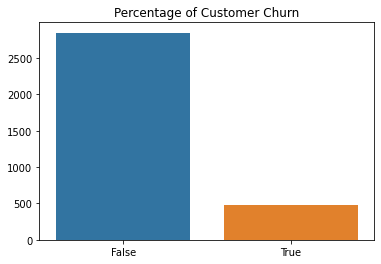

Churn Percentage = 0.0


Figure(id='1518', ...)

In [ ]:
#EDA
y = df["Churn?"].value_counts()
sns.barplot(y.index, y.values).set_title("Percentage of Customer Churn")
plt.show()

y_True = df["Churn?"][df["Churn?"] == True]
print ("Churn Percentage = "+str( (y_True.shape[0] / df["Churn?"].shape[0]) * 100 ))

df.groupby(["State", "Churn?"]).size().unstack().plot_bokeh(kind='bar', stacked=True, figsize=(1080,512), title = "Number of customer churn based on state") 
pd.plotting.output_notebook()
plt.show()

df.groupby(["Area Code", "Churn?"]).size().unstack().plot_bokeh(kind='bar', stacked=True, figsize=(500,500),title = "Number of customer churn based on area code")

df.groupby(["Intl Plan", "Churn?"]).size().unstack().plot_bokeh(kind='bar', stacked=True, figsize=(500,500), title = "Number of customer churn based on Internationl Plan") 

df.groupby(["VMail Plan", "Churn?"]).size().unstack().plot_bokeh(kind='bar', stacked=True, figsize=(500,500), title = "Number of customer churn based on VMail Plan") 


The result above shows that there is 14.5 percent of current customer churn. It is significant in terms of a business so feature importance analysis will be conducted.

In [ ]:
x = df[df.columns[0:18]]
y = df[df.columns[-1:]]
y = df[df.columns[-1:]]

intlPlan= df['Intl Plan']  #save both for future use
vmailPlan= df['VMail Plan']
non_related = ["Area Code","State"] #before that already drop state

yes_no_cols = ["Intl Plan","VMail Plan"]
x[yes_no_cols] = x[yes_no_cols] == 'yes'

x=x.drop(non_related,axis=1)  #remove categorical value to prepare for
print(x.columns)


Index(['Intl Plan', 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


#C. Data Preparation
---
Data Preparation is related to the conversion of the raw dataset into analytic-friendly data set. The necessary data cleaning will be performed so the quality of the dataset is ensured before any model undergoes training.


##Label Encoding


While feature engineering can be related to many sophisticated methods such as One-hot encoding and binning, only data encoding applies to this data set. Data encoding is executed to convert the String value of Yes and No value to 1 and 0 respectively is done to make the data more suitable for training purposes. 

In [ ]:
print(x.shape)
le = LabelEncoder()
le.fit(df[df.columns[-1:]])
transformed = le.transform(df[df.columns[-1:]])
df["Churn?"] = transformed
df["Churn?"].head(4)
nominal_feature = ['Intl Plan', 'VMail Plan']

#transform back just in case you need it :3
#list(le.inverse_transform([2, 2, 1]))

no_nominal = x.drop(nominal_feature,axis=1)


(3333, 16)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Standardise Data
Normalization involves rescaling of attributes value to have a mean of 0 and a standard deviation of 1. This process is performed using scikit learn to ensure the objective function of every machine learning algorithm involves lower biases on training and feature selection process.

In [ ]:
#normalise pca data before pca operation
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(no_nominal, y, test_size=0.25, random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


##Pearson Correlation Analysis
By using a basic correlation function, Pearson correlation from pandas library, several highly correlated column is identified such as day minutes with day charge, evening minutes with evening charge and night minutes with night charges. As a result, columns of day minutes, evening minutes and night minutes are eliminated.

In [ ]:
corrDf= pd.DataFrame(x_train,columns=no_nominal.columns)

print("Feature correlation:",corrDf.corr(method='pearson', min_periods=1))

Feature correlation:                 VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  \
VMail Message        1.000000 -0.003530   0.006300   -0.003532  0.016427   
Day Mins            -0.003530  1.000000   0.007825    1.000000  0.013613   
Day Calls            0.006300  0.007825   1.000000    0.007824 -0.027894   
Day Charge          -0.003532  1.000000   0.007824    1.000000  0.013625   
Eve Mins             0.016427  0.013613  -0.027894    0.013625  1.000000   
Eve Calls           -0.013112  0.016348   0.013204    0.016347 -0.040735   
Eve Charge           0.016441  0.013609  -0.027885    0.013621  1.000000   
Night Mins           0.021440 -0.012389   0.022026   -0.012386 -0.001025   
Night Calls          0.001582  0.015878  -0.014645    0.015878  0.006786   
Night Charge         0.021451 -0.012395   0.022024   -0.012392 -0.001026   
Intl Mins            0.010159 -0.014278   0.008872   -0.014284 -0.015668   
Intl Calls           0.004631 -0.000556  -0.008208   -0.000567 -0.0

Output from Spyder
![Figure 1 - Output of Extra Tree Clasifier](https://drive.google.com/uc?export=view&id=1_RcItiSl0v1tB-yPH9K7FZPBboXrxKHz)



##Principal Components Analysis (PCA)

Following on the correlation analysis, the data undergo a feature selection process using Principal Component Analysis (PCA) to rank the column based on value variances on produced, which will be related to the outcome of churn. However, the PCA component that explained the highest variance ration is just 38 percent so this result produced by it is not significant and not applicable for this dataset. Besides, the dataset is not a linear model so the PCA component will not be used for the following

In [ ]:
principalComponents = PCA()
principalComponents.fit_transform(x_train)
pcaVar= principalComponents.explained_variance_ratio_
print(pcaVar)

[1.47347775e-01 1.43996646e-01 1.41009504e-01 1.40180469e-01
 7.48333050e-02 7.28561673e-02 7.19640806e-02 7.08043827e-02
 6.94948244e-02 6.75122561e-02 5.15089180e-07 5.63046167e-08
 1.59587566e-08 3.44526346e-09]


##Extra Tree Classifier(ETC) Component Analysis
Lastly, we apply another Extra Tree Classifier(ETC) to find out the less important feature for this data set. The result of ETC shows that VMail Plan, Eve Calls, Night Calls and Night Charges has less significant in the churn of Verizon customers. Thus, those columns are eliminated from the dataset.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


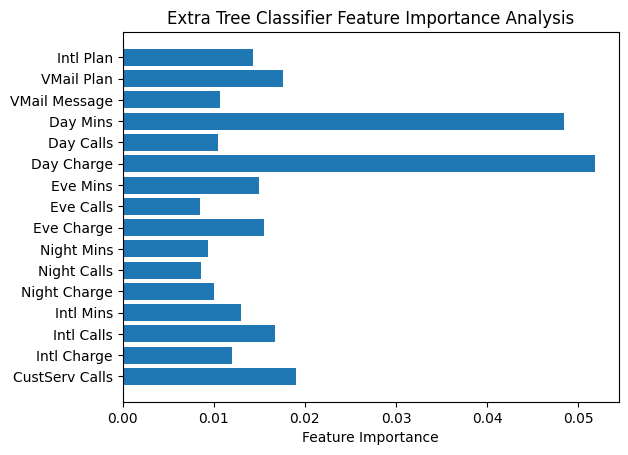

In [ ]:
x['Intl Plan']=intlPlan
x['VMail Plan']=vmailPlan
x['Intl Plan']=le.fit_transform(x['Intl Plan'])
x['VMail Plan']=le.fit_transform(x['VMail Plan'])
#add back the column, categorical fits for tree classification algorithm


#use another x train and y train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#standardise data
scaler = StandardScaler()

extraTreeFeature = scaler.fit_transform(x_train)
extraTreeFeature = pd.DataFrame(extraTreeFeature,columns = x.columns)
def extraTreeImportance():
    etc= ExtraTreesClassifier(random_state=1)
    etc.fit(extraTreeFeature,y_train)
    feature_importance=etc.feature_importances_
    normalised_feature_importances= np.std([tree.feature_importances_ for tree in 
                                    etc.estimators_],axis=0)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    item=np.arange(len(extraTreeFeature.columns))
    #horizontal bar chart
    plt.barh(item,normalised_feature_importances)
    ax.set_yticks(item)
    ax.set_yticklabels(extraTreeFeature.columns)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel("Feature Importance")
    ax.set_title("Extra Tree Classifier Feature Importance Analysis")
    plt.show

extraTreeImportance()


##Pick Feature and Labels

As the result, more columns with less significance are eliminated are based on the analysis in the previous section

In [ ]:
string_attributes=['Intl Mins','Day Mins','Eve Mins','Night Mins','VMail Message','Night Calls','Eve Calls','Night Charge']
x = x.drop(string_attributes, axis=1) 


Lastly, the data is spitted into a training set and test set so cross-validation can be performed for an accuracy score.

Before any modeling is executed, a basic train-test-split with 25 percent of the sample size as test data was done with as shown below. Besides, the model will create a prediction based on stratified data based on the churn and non-churn customer using the best parameter available.

In [ ]:
#scale data before modelling
x = x.values
y = y['Churn?'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


The dataframe is now ready for modelling

#D. Modeling
---
The results of data understanding show that we are going to perform classification from our dataset. This means that the data should be linearly separable. Due to the time limitation for this project, we decided to go with the modeling technique that consumes less time while providing an acceptable accuracy. We only have about 8 features after the feature engineering process so we wanted to explore different modeling techniques, such as Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Decision Trees and many more. As for the result, we find out that some of the modeling technique does not perform very well with our dataset. It turns out that some modeling techniques might require more features to be accurate. Therefore, we decided to just nitpick some modeling techniques that produce acceptable results and perform Grid Search Cross-Validation for their respective parameters for optimization purposes [[5]](#5). Besides that, Grid Search Cross-Validation can also "test" our machine learning model to check for overfitting and to get an idea about how our machine model will generalize the independent data. Furthermore, we also tested the model with two different sampling methods, a normal split train-test for random sampling and also with Stratified K-Fold for stratified sampling. The reason behind this is to ensure the model will not oversample the minority by firstly cross-validating the model through Stratified Cross-Validation. With this method, we are able to ensure that the model has no imbalanced classifiers and all the individuals within the dataset are represented properly [[4]](#4). This can improve the performance and reliability of the model. After considering our accuracy ranking and criteria for our model, the modeling techniques that we used at the end is Decision Tree, Light Gradient Boosting and Random Forest. As an addition, we also added a confusion matrix heatmap and Receiver Operating Characteristics(ROC) curve for us to help visualize the data. 



## Data Stratifier Function

In [ ]:
#do run from top to this cell if want to test out the model below
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10, **kwargs):
    stratified_k_fold = StratifiedKFold(n_splits=10, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X,y): 
        X_train, X_test = X[ii], X[jj]
        y_train, y_test = y[ii], y[jj]
        #scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        #print(y_train)
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

##Logistic Regression

###With Non-Stratefied Data

Logistic Regression Accuracy: 0.854916067146283
              precision    recall  f1-score   support

   non-churn       0.87      0.97      0.92       712
       churn       0.51      0.16      0.25       122

    accuracy                           0.85       834
   macro avg       0.69      0.57      0.58       834
weighted avg       0.82      0.85      0.82       834



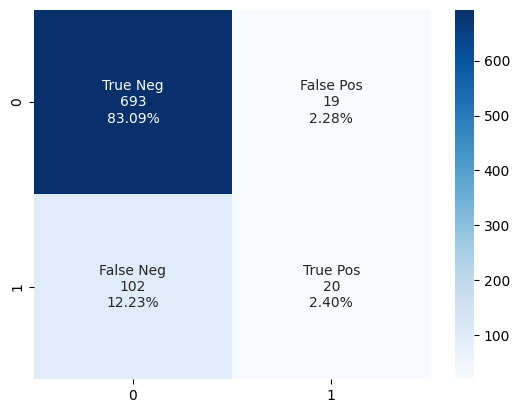

In [ ]:
logreg = LogisticRegression()
#fit the model with data
logreg.fit(x_train,y_train)
predictions = logreg.predict(x_test)
score = logreg.score(x_test, y_test)
print("Logistic Regression Accuracy: {}".format(score))

cf_matrix = confusion_matrix(y_test, predictions)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

target_names = ['non-churn', 'churn']
print(classification_report(y_test, predictions, target_names=target_names))

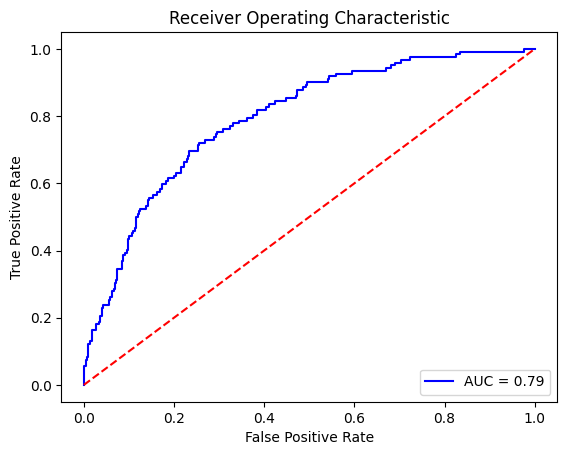

In [ ]:
#ROC curve
predProb = logreg.predict_proba(x_test)


preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Stratified Data

In [ ]:
target_names = ['Non-churn', 'Churn']
prediction= stratified_cv(x, y, LogisticRegression)
print('Logistic Regression:			{:.2f}'.format(accuracy_score(y, prediction)))
print((classification_report(y, prediction, target_names=target_names)))

Logistic Regression:			0.86
              precision    recall  f1-score   support

   Non-churn       0.88      0.97      0.92      2850
       Churn       0.56      0.20      0.29       483

    accuracy                           0.86      3333
   macro avg       0.72      0.59      0.61      3333
weighted avg       0.83      0.86      0.83      3333



##Synthetic Minority Oversampling Technique(SMOTE)

Resampled Logistic Regression Accuracy: 0.7482014388489209


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

   non-churn       0.94      0.76      0.84       712
       churn       0.33      0.70      0.45       122

    accuracy                           0.75       834
   macro avg       0.63      0.73      0.64       834
weighted avg       0.85      0.75      0.78       834



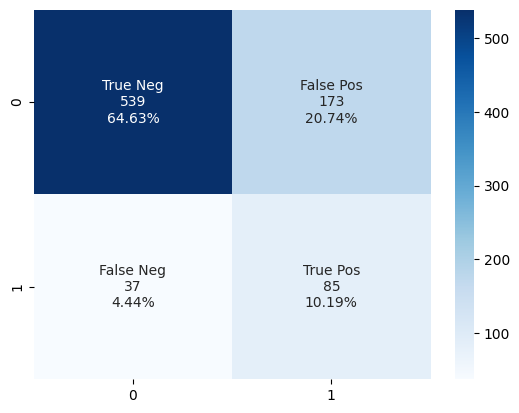

In [ ]:
sm = SMOTE(random_state = 1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
clf = LogisticRegression()
model_res = clf.fit(x_train_res, y_train_res)
y_pred = clf.predict(x_test)
print("Resampled Logistic Regression Accuracy: {}".format(model_res.score(x_test, y_test)))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))




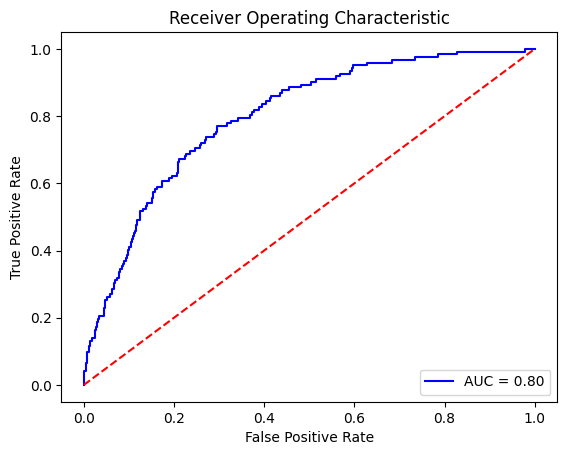

In [ ]:
#ROC curve
predProb = clf.predict_proba(x_test)


preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Gaussian Naive Bayes

###With Manual Parameter

Naive Bayes Accuracy: 0.841726618705036
              precision    recall  f1-score   support

   non-churn       0.89      0.97      0.93       712
       churn       0.65      0.30      0.41       122

    accuracy                           0.87       834
   macro avg       0.77      0.63      0.67       834
weighted avg       0.86      0.87      0.85       834



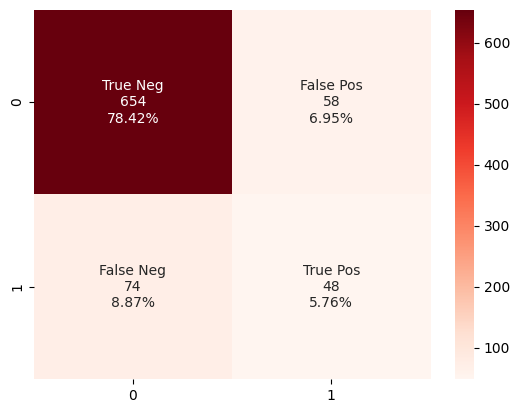

In [ ]:
model = GaussianNB()                      
model.fit(x_train, y_train)       
y_model = model.predict(x_test)                        
naiveAcc=accuracy_score(y_test, y_model)
print('Naive Bayes Accuracy: {}'.format(naiveAcc))

cf_matrix = confusion_matrix(y_test, y_model)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

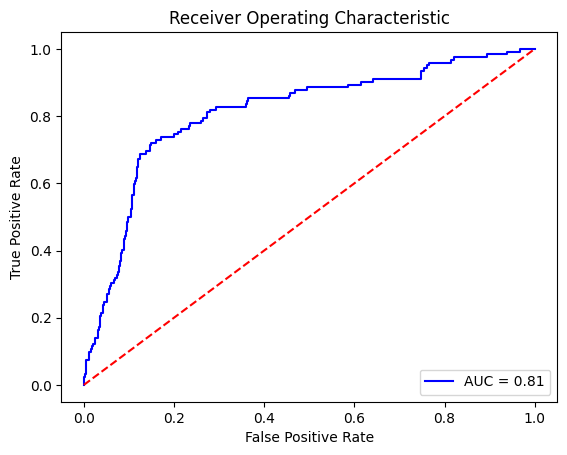

In [ ]:
#ROC Curve
predProb = model.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Adaptive Boost and Grid Search

Best params: {'learning_rate': 0.1, 'n_estimators': 50}
Best accuracy: 0.8783502008032128
              precision    recall  f1-score   support

   non-churn       0.89      0.97      0.92       712
       churn       0.59      0.27      0.37       122

    accuracy                           0.87       834
   macro avg       0.74      0.62      0.65       834
weighted avg       0.84      0.87      0.84       834



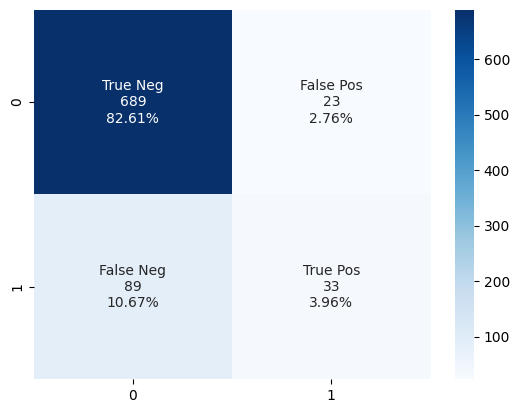

In [ ]:
model = GaussianNB() 
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier(base_estimator = model,algorithm="SAMME.R",random_state=1)
search_grid={'n_estimators':[50,100,150],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=crossvalidation)
search.fit(x_train,y_train)
y_pred = search.predict(x_test)
print("Best params: {}".format(search.best_params_))
print("Best accuracy: {}".format(search.best_score_))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

###On Stratified Data

In [ ]:

prediction =  stratified_cv(x, y, GaussianNB)
print('GaussianNB Classifier:  {:.2f}'.format(accuracy_score(y,prediction)))
target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

GaussianNB Classifier:  0.85
              precision    recall  f1-score   support

   Non-churn       0.90      0.92      0.91      2850
       Churn       0.48      0.42      0.45       483

    accuracy                           0.85      3333
   macro avg       0.69      0.67      0.68      3333
weighted avg       0.84      0.85      0.85      3333



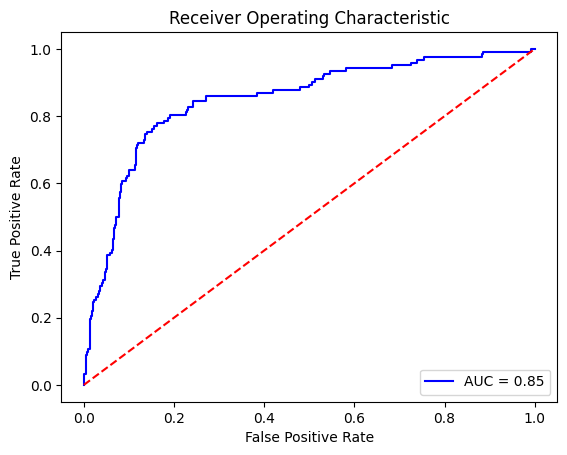

In [ ]:
#ROC curve
predProb = search.predict_proba(x_test)

preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##Adaboost Gaussian Naive Bayes

###On Non-Stratified Data

Adap Boosted NB Accuracy: 0.8741007194244604
              precision    recall  f1-score   support

   non-churn       0.89      0.97      0.93       712
       churn       0.65      0.30      0.41       122

    accuracy                           0.87       834
   macro avg       0.77      0.63      0.67       834
weighted avg       0.86      0.87      0.85       834



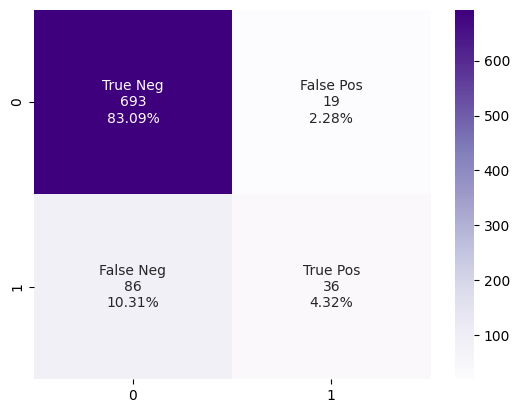

In [ ]:
model = GaussianNB() 
adapBoost = AdaBoostClassifier(base_estimator= model,n_estimators=50,learning_rate=0.1,algorithm="SAMME")#default SAMME
adapBoost.fit(x_train,y_train)
y_pred = adapBoost.predict(x_test)
print("Adap Boosted NB Accuracy:",adapBoost.score(x_test, y_test))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Purples')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

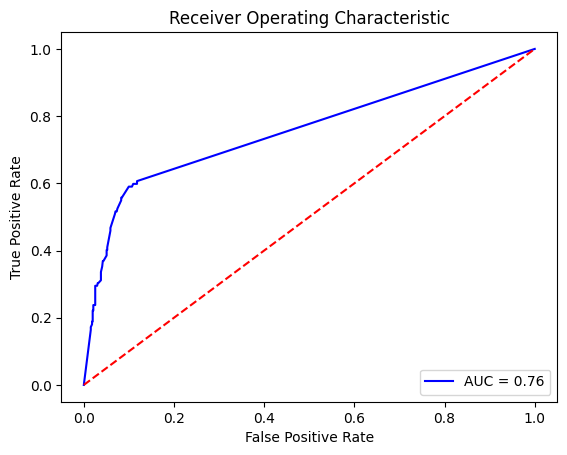

In [ ]:
#ROC Curve
predProb = adapBoost.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data

In [ ]:
model = GaussianNB()
# define the model
model = AdaBoostClassifier(base_estimator= model,n_estimators=50,learning_rate=0.1,algorithm="SAMME")
# evaluate the model
cv = StratifiedKFold(n_splits=10, shuffle = True)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.878 (0.009)


##K-Nearest Neighbour Classifier

###With Manual Parameter

KNN Accuracy: 0.8884892086330936
              precision    recall  f1-score   support

   non-churn       0.91      0.96      0.94       712
       churn       0.68      0.45      0.54       122

    accuracy                           0.89       834
   macro avg       0.80      0.71      0.74       834
weighted avg       0.88      0.89      0.88       834



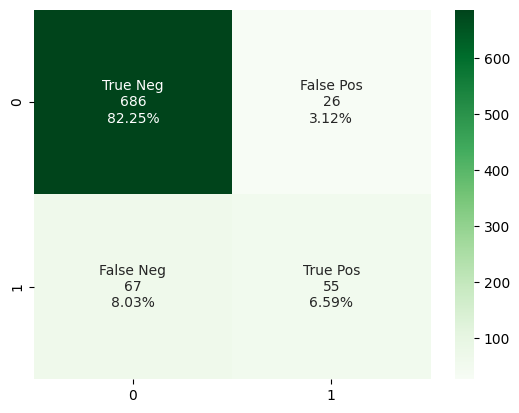

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3,weights='distance',p=1,leaf_size=1)
knn.fit(x_train, y_train)
print("KNN Accuracy: {}".format(knn.score(x_test,y_test)))

y_pred = knn.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

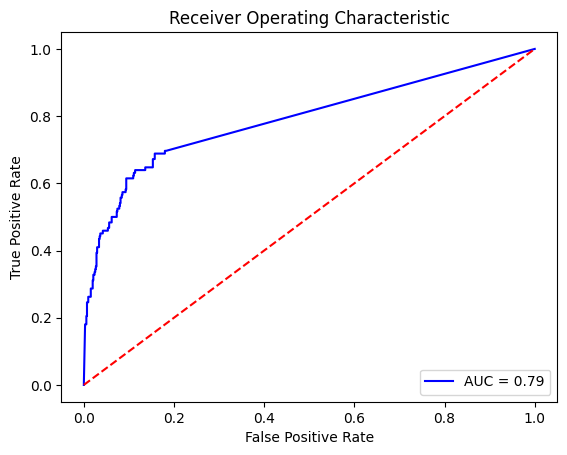

In [ ]:
#ROC Curve
predProb = knn.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Grid Search

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3
              precision    recall  f1-score   support

   non-churn       0.94      0.98      0.96       712
       churn       0.87      0.62      0.73       122

    accuracy                           0.93       834
   macro avg       0.91      0.80      0.84       834
weighted avg       0.93      0.93      0.93       834



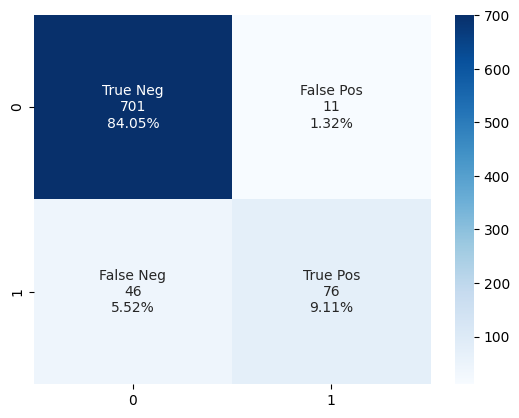

In [ ]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#Fit the model

best_model = clf.fit(x_test,y_test)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
y_pred = clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


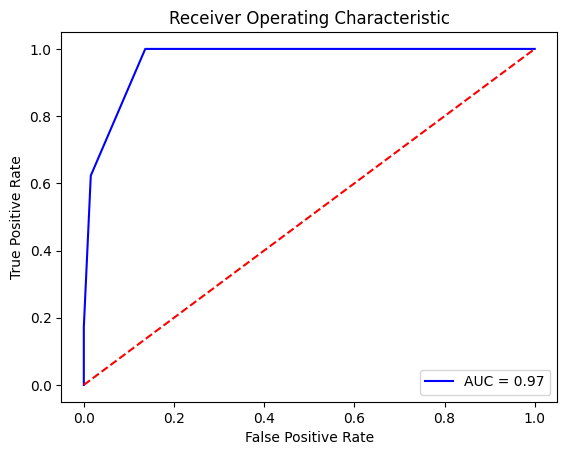

In [ ]:
#ROC curve
predProb = best_model.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data

In [ ]:
prediction = stratified_cv(x, y, KNeighborsClassifier, n_neighbors = 3,weights='distance',p=1,leaf_size=1)
print('K Nearest Neighbor Classifier: {:.2f}'.format(accuracy_score(y, prediction)))
target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

K Nearest Neighbor Classifier: 0.90
              precision    recall  f1-score   support

   Non-churn       0.91      0.97      0.94      2850
       Churn       0.72      0.46      0.56       483

    accuracy                           0.90      3333
   macro avg       0.82      0.72      0.75      3333
weighted avg       0.89      0.90      0.89      3333



##Decision Tree


Due to the constraint of computer hardware resources, we only managed to do a grid search on a few hyper-parameters on the model itself. Those hyper-parameters were chosen after we go through the documentation of the modeling technique on the official website and also referring others to user opinions on the Internet. It turns out many of the hyper-parameters were not suitable for our use cases and we only need to tweaks a few of them to obtain a good result. In the grid search for the decision tree, criterion, max depth and minimum samples split are chosen. As for the Adaboost, the only number of estimators and learning rates are used. A total of two rounds using grid search are deployed, one for the decision tree itself and one for the decision tree with Adaboost. The final results obtained will be the one from the latter.

###With Manual Parameter

Desicion Tree Accuracy: 0.9328537170263789
              precision    recall  f1-score   support

   non-churn       0.96      0.96      0.96       712
       churn       0.78      0.76      0.77       122

    accuracy                           0.93       834
   macro avg       0.87      0.86      0.86       834
weighted avg       0.93      0.93      0.93       834



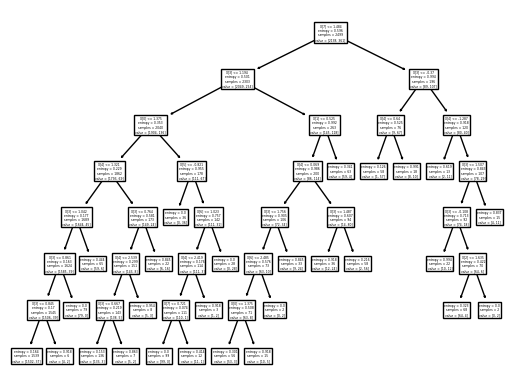

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_split=70,splitter ='best',random_state = 1)#presort deprecated
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Plot Tree
tree.plot_tree(clf)
print("Desicion Tree Accuracy:",accuracy_score(y_test, y_pred))
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


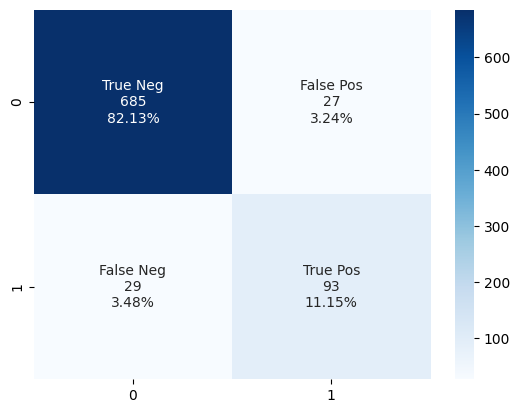

In [ ]:
#Plot heatmap
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
plt.close()
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

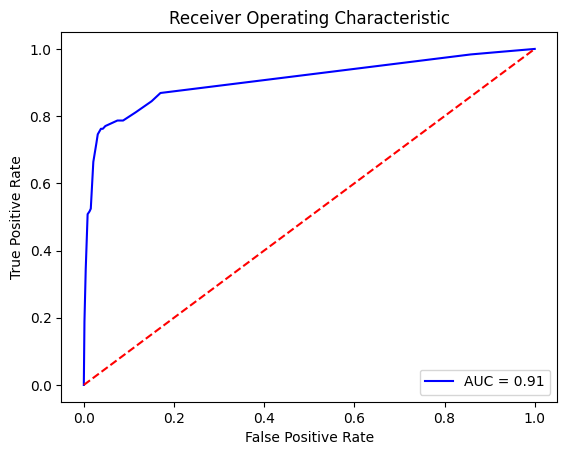

In [ ]:
#ROC Curve
predProb = clf.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Grid Search and ADA Boosting

Best params: {'learning_rate': 0.1, 'n_estimators': 400}
Best accuracy: 0.9490028951106796
              precision    recall  f1-score   support

   non-churn       0.88      0.93      0.91       712
       churn       0.40      0.28      0.33       122

    accuracy                           0.83       834
   macro avg       0.64      0.60      0.62       834
weighted avg       0.81      0.83      0.82       834



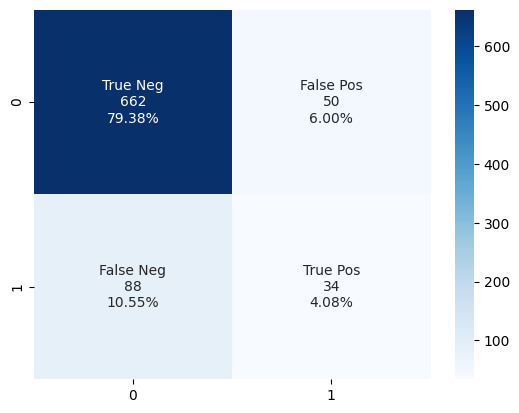

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=30,splitter ='best',random_state = 1)
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier(base_estimator = clf,algorithm="SAMME")
search_grid={'n_estimators':[100,150,200,300,400,500],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=-1,cv=crossvalidation)
search.fit(x,y)
y_pred = search.predict(x_test)
print("Best params: {}".format(search.best_params_))
print("Best accuracy: {}".format(search.best_score_))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


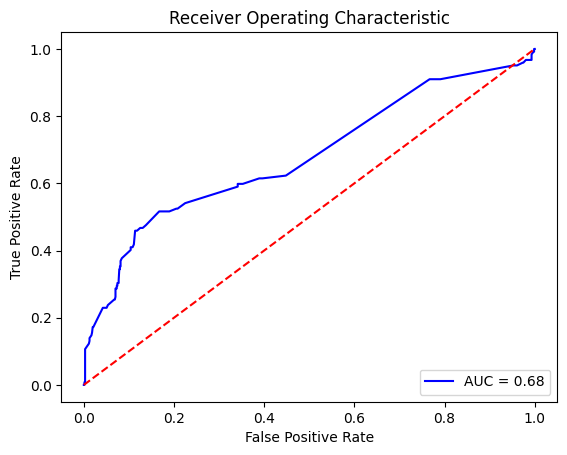

In [ ]:
#ROC curve
predProb = search.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data

In [ ]:
print('Decision Tree Classifier:  {:.2f}'.format(accuracy_score(y, stratified_cv(x, y, DecisionTreeClassifier))))
target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

Decision Tree Classifier:  0.92
              precision    recall  f1-score   support

   Non-churn       0.96      0.99      0.97      2850
       Churn       0.91      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333



##Adaboost Decision Tree

###On Non-Stratified Data



Adap Boosted Desicion Tree Accuracy: 0.9232613908872902
              precision    recall  f1-score   support

   non-churn       0.93      0.98      0.96       712
       churn       0.86      0.57      0.68       122

    accuracy                           0.92       834
   macro avg       0.90      0.78      0.82       834
weighted avg       0.92      0.92      0.92       834



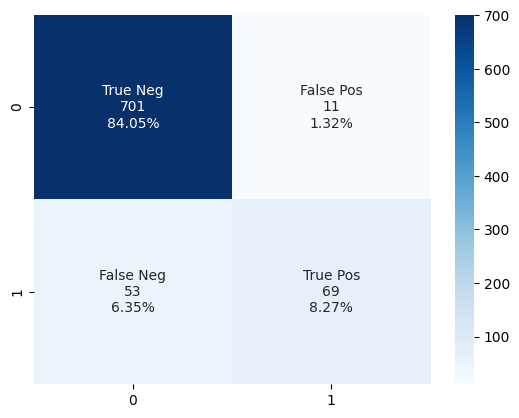

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=30,splitter ='best',random_state = 1)
#adapBoost = AdaBoostClassifier(base_estimator= clf,n_estimators=400,learning_rate=1)
adapBoost = AdaBoostClassifier(base_estimator= clf,n_estimators=400,learning_rate=0.1)
#adapClass = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
adapBoost.fit(x_train,y_train)
print("Adap Boosted Desicion Tree Accuracy:",adapBoost.score(x_test, y_test))
y_pred= adapBoost.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

###On Stratified Data

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=9,min_samples_split=30,splitter ='best',random_state = 1)
# define the model
model = AdaBoostClassifier(base_estimator= clf,n_estimators=400,learning_rate=0.1)
# evaluate the model
cv = StratifiedKFold(n_splits=10, shuffle = True)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))




Accuracy: 0.932 (0.011)


##Xgboost Decision Tree

###With custom parameter

Xgboost Desicion Tree Accuracy: 0.9448441247002398
              precision    recall  f1-score   support

   non-churn       0.96      0.98      0.97       712
       churn       0.87      0.74      0.80       122

    accuracy                           0.94       834
   macro avg       0.91      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



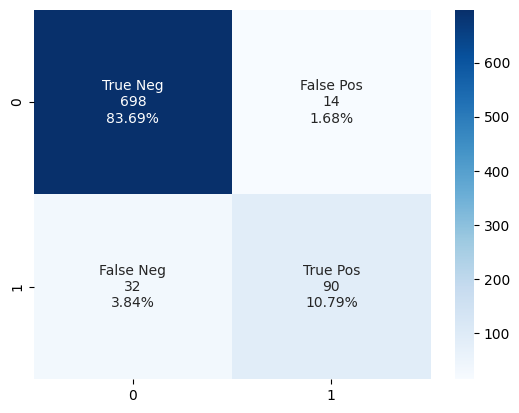

In [ ]:
model=xgb.XGBClassifier(random_state=1,colsample_bytree = 0.7596147044602517, gamma = 0.027610585618011996, learning_rate = 0.24463842853645024, max_depth= 3, n_estimators= 107, subsample= 0.8916028672163949)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Xgboost Desicion Tree Accuracy: {}".format(model.score(x_test,y_test)))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


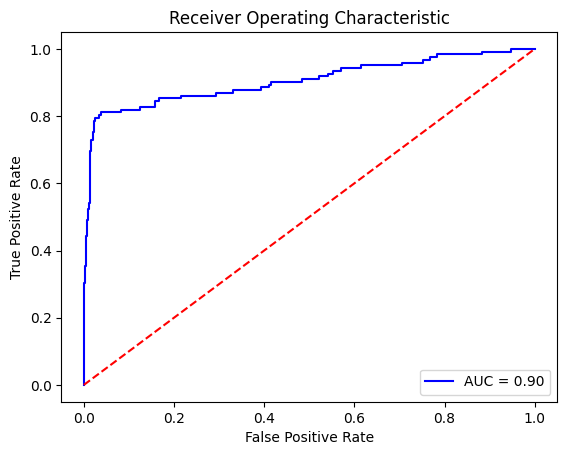

In [ ]:
#ROC Curve
predProb = model.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Randomised Search

In [ ]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.1min finished


Model with rank: 1
Mean validation score: 0.956 (std: 0.010)
Parameters: {'colsample_bytree': 0.7596147044602517, 'gamma': 0.027610585618011996, 'learning_rate': 0.24463842853645024, 'max_depth': 3, 'n_estimators': 107, 'subsample': 0.8916028672163949}

              precision    recall  f1-score   support

   non-churn       0.96      0.98      0.97       712
       churn       0.87      0.74      0.80       122

    accuracy                           0.94       834
   macro avg       0.91      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



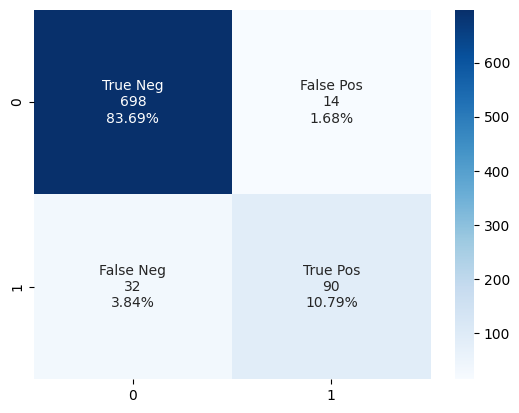

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=1)
params = {
  "colsample_bytree": uniform(0.7, 0.3),
  "gamma": uniform(0, 5),
  "learning_rate": uniform(0, 0.3), # default 0.1 
  "max_depth": randint(3, 7), # default 3
  "n_estimators": randint(100, 200), # default 100
  "subsample": uniform(0.6, 0.4),
  #"min_child_weight": uniform(0,1)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=5, verbose=1, n_jobs=-1, return_train_score=True)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
report_best_scores(search.cv_results_, 1)

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

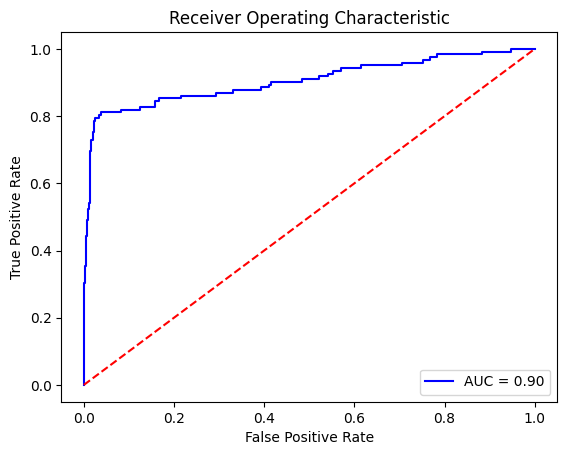

In [ ]:
#ROC Curve
predProb = search.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data


In [ ]:
prediction = stratified_cv(x, y, xgb.XGBClassifier)
print('Xgboost Decision Tree Classifier:  {:.2f}'.format(accuracy_score(y, prediction)))
target_names = ['non-churn', 'churn']
print(classification_report(y, prediction, target_names=target_names))

Xgboost Decision Tree Classifier:  0.95
              precision    recall  f1-score   support

   non-churn       0.96      0.99      0.97      2850
       churn       0.91      0.73      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333



##Gradient Boosting

###With Manual Parameter

Gradient Boosting Accuracy: 0.9388489208633094
              precision    recall  f1-score   support

   non-churn       0.94      0.99      0.97       712
       churn       0.93      0.63      0.75       122

    accuracy                           0.94       834
   macro avg       0.93      0.81      0.86       834
weighted avg       0.94      0.94      0.93       834



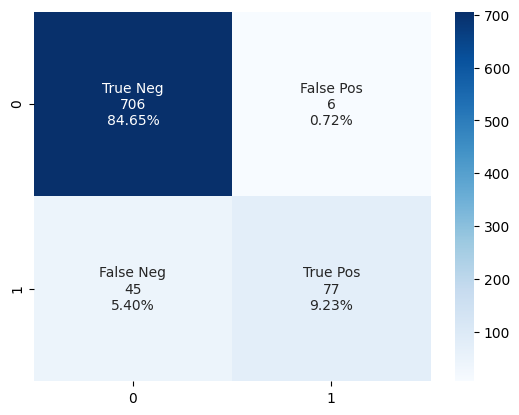

In [ ]:
clf = GradientBoostingClassifier(n_estimators=176,learning_rate=0.008190893636533138,max_depth=4,min_samples_split=0.010364261335231939,subsample=0.6424845129341422,random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Gradient Boosting Accuracy: {}".format(accuracy_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

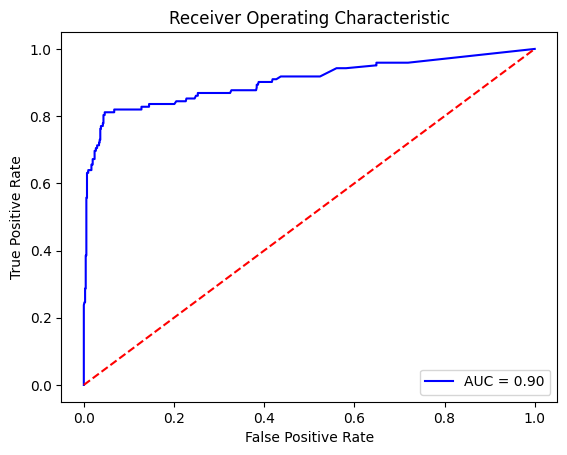

In [ ]:
#ROC Curve
predProb = clf.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Randomised Search

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  2.4min finished


Model with rank: 1
Mean validation score: 0.938 (std: 0.009)
Parameters: {'learning_rate': 0.008190893636533138, 'max_depth': 4, 'min_samples_split': 0.010364261335231939, 'n_estimators': 176, 'subsample': 0.6424845129341422}

              precision    recall  f1-score   support

   non-churn       0.94      0.99      0.97       712
       churn       0.93      0.63      0.75       122

    accuracy                           0.94       834
   macro avg       0.93      0.81      0.86       834
weighted avg       0.94      0.94      0.93       834



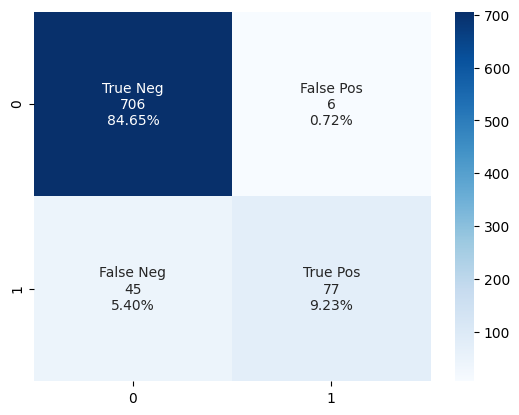

In [ ]:
gb_model = GradientBoostingClassifier(random_state = 1)
params = {
    #"validation_fraction": uniform(0,0.1),
    "min_samples_split": uniform(0,1),
    #"min_samples_leaf": uniform(0,0.5),
    "learning_rate": uniform(0.001, 0.01), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 200), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(gb_model, param_distributions=params, random_state=1, n_iter=200, cv=3, verbose=1, n_jobs=-1, return_train_score=True)
search.fit(x_train, y_train)
y_pred = search.predict(x_test)
report_best_scores(search.cv_results_, 1)

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


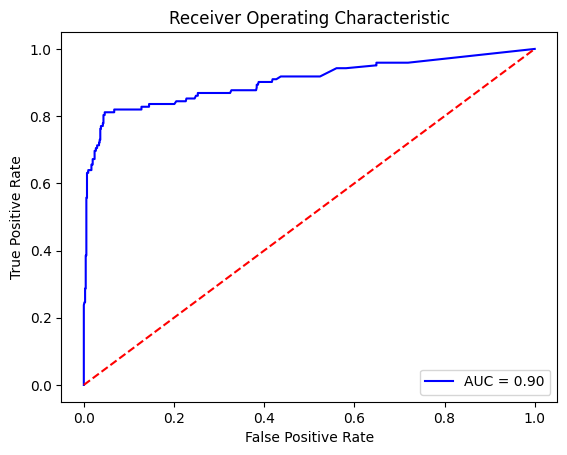

In [ ]:
#ROC Curve
predProb = search.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data

In [ ]:
prediction = stratified_cv(x, y, GradientBoostingClassifier, n_estimators=176,learning_rate=0.008190893636533138,max_depth=4,min_samples_split=0.010364261335231939,subsample=0.6424845129341422,random_state=1)
print('Gradient Boosting Classifier:  {:.2f}'.format(accuracy_score(y, prediction)))

target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

Gradient Boosting Classifier:  0.94
              precision    recall  f1-score   support

   Non-churn       0.94      0.99      0.96      2850
       Churn       0.94      0.61      0.74       483

    accuracy                           0.94      3333
   macro avg       0.94      0.80      0.85      3333
weighted avg       0.94      0.94      0.93      3333



##Light Gradient Boosting

As another tree-based learning algorithm, Light Gradient Boosting(LGBM) is used in the modeling. This algorithm is robust in terms of functionality as it provides many types of parameters, such as core parameter, learning control parameter and Input and Output(IO) Parameter. However, this is a double-edged sword for this project as the team is only given one month, where the perfect tuning of such a complex algorithm is near to impossible. During the tuning of the algorithm, the team managed to perform grid search on only nine parameters out of over-hundred parameter, which is n_estimators, colsample_bytree, max_depth, num_leaves and others. As a result, the model seems underperformed with a minimal amount of parameter tuning.

###With Manual Parameter

LightGBM Model accuracy score: 0.9448
              precision    recall  f1-score   support

   non-churn       0.96      0.98      0.97       712
       churn       0.85      0.75      0.80       122

    accuracy                           0.94       834
   macro avg       0.91      0.87      0.88       834
weighted avg       0.94      0.94      0.94       834



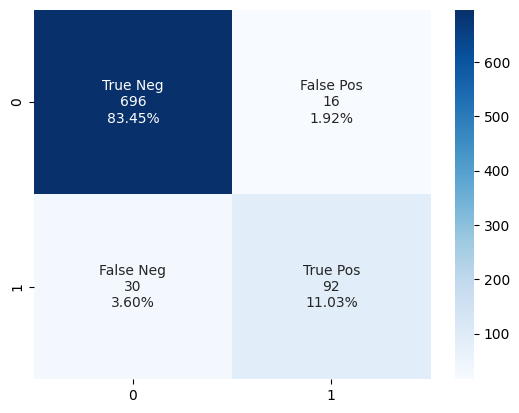

In [ ]:
clf = LGBMClassifier(random_state = 1)
clf.fit(x_train, y_train)
# predict the results
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

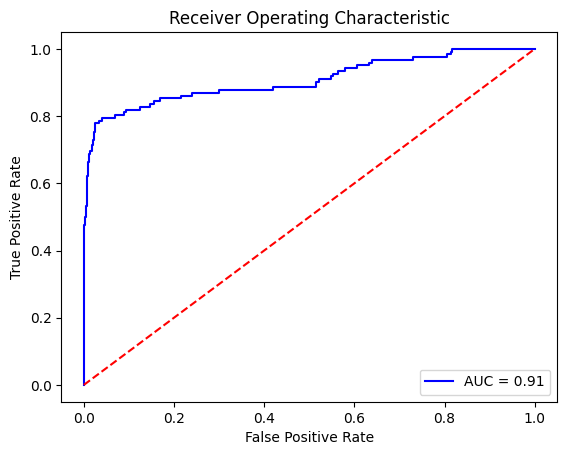

In [ ]:
#ROC Curve
predProb = clf.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Pipeline and Grid Search

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(x_train, y_train)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(x_test)
    else:
      pred = fitted_model.predict(x_test)
    
    return fitted_model, pred

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 6841 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 7934 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 9109 tasks      | 

Best Score: 0.9495847695390781
Best Params:{'colsample_bytree': 0.8, 'max_depth': 15, 'min_split_gain': 0.4, 'n_estimators': 400, 'num_leaves': 50, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.8, 'subsample_freq': 20}
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2014 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2904 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3958 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5172 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 6550 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 9790 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 11652 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 13678 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 14580 out of 14580 | elapsed: 21.1min finished


Light Gradient Boosting Accuracy: 0.9424460431654677
              precision    recall  f1-score   support

   non-churn       0.96      0.98      0.97       712
       churn       0.85      0.74      0.79       122

    accuracy                           0.94       834
   macro avg       0.90      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



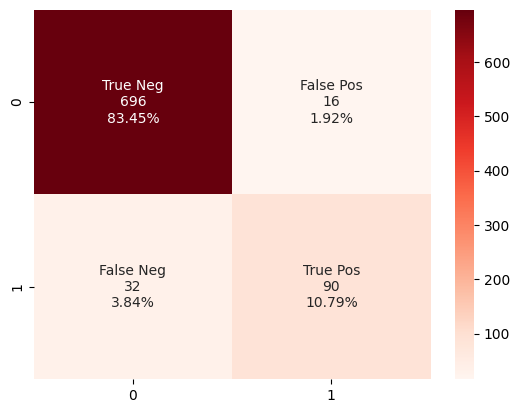

In [ ]:
model = LGBMClassifier(random_state = 1)
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                  param_grid, cv=5, scoring_fit='accuracy')

print("Best Score: {}".format(model.best_score_))
print("Best Params:{}".format(model.best_params_))


model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Light Gradient Boosting Accuracy:",accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

###On Stratified Data

In [ ]:
prediction = stratified_cv(x, y, LGBMClassifier)
print('LGBM Classifier:  {:.2f}'.format(accuracy_score(y, prediction)))
target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

LGBM Classifier:  0.95
              precision    recall  f1-score   support

   Non-churn       0.96      0.99      0.97      2850
       Churn       0.91      0.75      0.82       483

    accuracy                           0.95      3333
   macro avg       0.93      0.87      0.90      3333
weighted avg       0.95      0.95      0.95      3333



##Support Vector Machine

###With Manual Parameter

Accuracy: 0.9268585131894485
              precision    recall  f1-score   support

   non-churn       0.94      0.97      0.96       712
       churn       0.81      0.65      0.72       122

    accuracy                           0.93       834
   macro avg       0.88      0.81      0.84       834
weighted avg       0.92      0.93      0.92       834



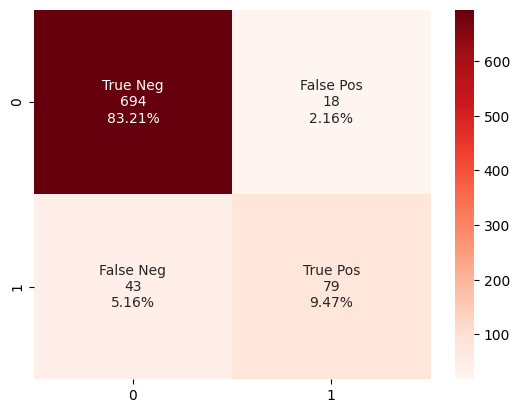

In [ ]:
clf = SVC(kernel='rbf', C = 10, gamma=0.1,probability=True)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

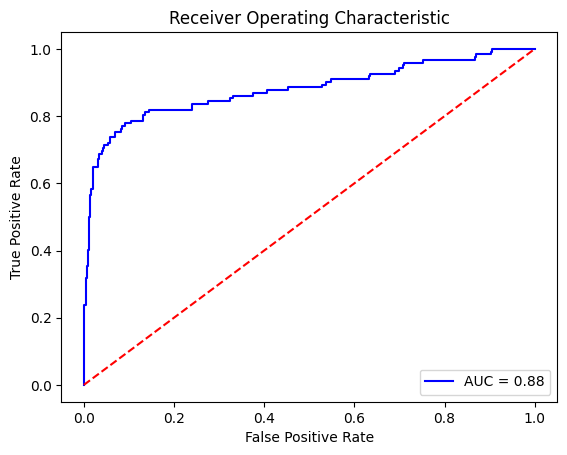

In [ ]:
#ROC Curve
predProb = clf.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###SVC with GridSearch

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# fitting the model for grid search 
grid.fit(x_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 44.9min
[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed: 383.7min finished


{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01, probability=True)


NameError: ignored

0.9112709832134293
              precision    recall  f1-score   support

   non-churn       0.93      0.97      0.95       712
       churn       0.77      0.56      0.65       122

    accuracy                           0.91       834
   macro avg       0.85      0.76      0.80       834
weighted avg       0.90      0.91      0.91       834



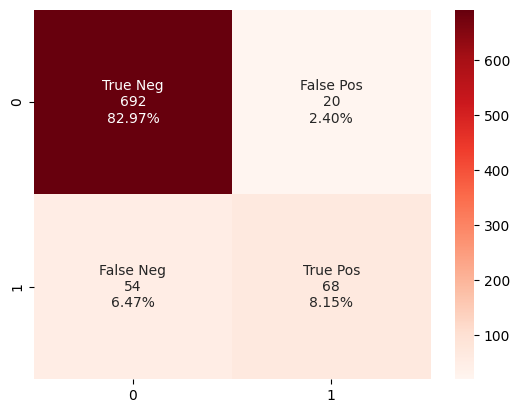

In [ ]:
#Best parameter
#{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
#SVC(C=100, gamma=0.01, probability=True)

#Using the best Hyperparameters to generate heatmap and ROC curve
best_model = SVC(C=100, gamma=0.01, probability=True,kernel='rbf')
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

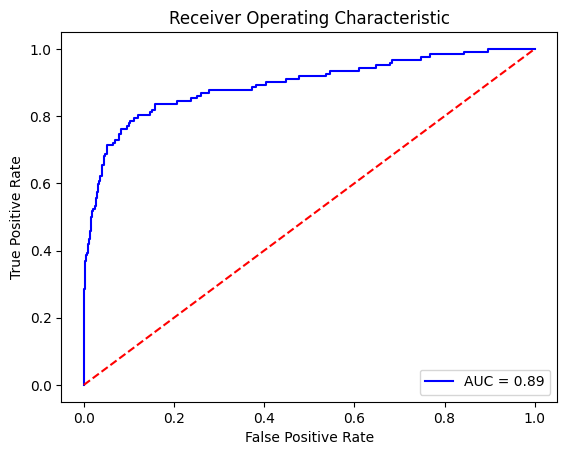

In [ ]:
#ROC Curve
predProb = best_model.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###SVC on Stratified Data

Support vector machine(SVM):   0.94
              precision    recall  f1-score   support

   non-churn       0.95      0.98      0.96      2850
       churn       0.85      0.69      0.76       483

    accuracy                           0.94      3333
   macro avg       0.90      0.84      0.86      3333
weighted avg       0.93      0.94      0.93      3333



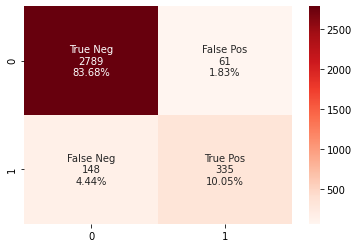

In [ ]:
prediction=stratified_cv(x, y, SVC, kernel='rbf', C = 10, gamma=0.1,probability=True)
print('Support vector machine(SVM):   {:.2f}'.format(accuracy_score(y,prediction)))

cf_matrix = confusion_matrix(y, prediction)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')
target_names = ['non-churn', 'churn']
print(classification_report(y, prediction, target_names=target_names))

##Perceptron

###On Non-Stratified Data

Accuracy: 0.77
              precision    recall  f1-score   support

   non-churn       0.89      0.83      0.86       712
       churn       0.29      0.41      0.34       122

    accuracy                           0.77       834
   macro avg       0.59      0.62      0.60       834
weighted avg       0.80      0.77      0.78       834



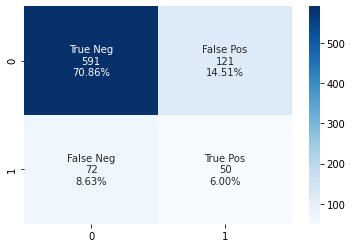

In [ ]:
ppn = Perceptron(alpha=0.0001, class_weight=None, eta0=1, fit_intercept=True,
    max_iter=1000, n_jobs=-1, penalty=None, random_state=1,
    shuffle=True, tol=1e-3, verbose=0, warm_start=False)
# Train the perceptron
ppn.fit(x_train, y_train)
y_pred = ppn.predict(x_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

###On Stratified Data

Perceptron:  0.79
              precision    recall  f1-score   support

   non-churn       0.88      0.87      0.87      2850
       churn       0.29      0.33      0.31       483

    accuracy                           0.79      3333
   macro avg       0.59      0.60      0.59      3333
weighted avg       0.80      0.79      0.79      3333



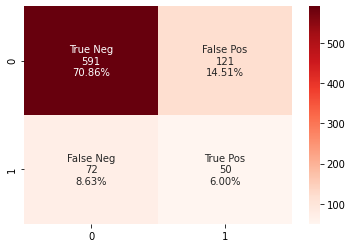

In [ ]:
prediction=stratified_cv(x, y, Perceptron, alpha=0.0001, class_weight=None, eta0=1, fit_intercept=True,
    max_iter=1000, n_jobs=-1, penalty=None, random_state=1,
    shuffle=True, tol=1e-3, verbose=0, warm_start=False)

print('Perceptron:  {:.2f}'.format(accuracy_score(y, prediction)))
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

target_names = ['non-churn', 'churn']
print(classification_report(y, prediction, target_names=target_names))

##Bagging

###On Non-Stratified Data

In [ ]:
kfold = KFold(n_splits=10, random_state=1)
#clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15,splitter ='best',random_state = 1)
model = BaggingClassifier()
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9462938986891082


###On Stratified Data

Bagging Classifier:  0.95
              precision    recall  f1-score   support

   non-churn       0.95      0.99      0.97      2850
       churn       0.90      0.72      0.80       483

    accuracy                           0.95      3333
   macro avg       0.93      0.85      0.89      3333
weighted avg       0.95      0.95      0.95      3333



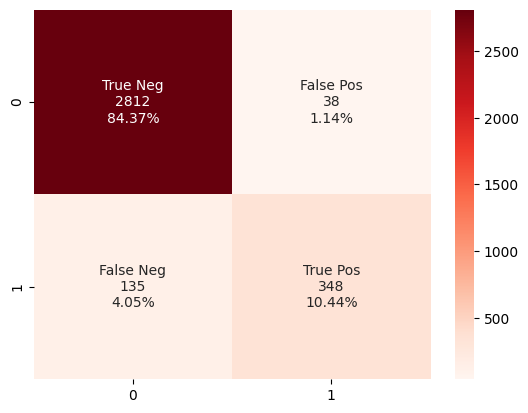

In [ ]:
prediction = stratified_cv(x, y, BaggingClassifier)

print('Bagging Classifier:  {:.2f}'.format(accuracy_score(y,prediction )))

cf_matrix = confusion_matrix(y, prediction)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greens')
target_names = ['non-churn', 'churn']
print(classification_report(y, prediction, target_names=target_names))

##Bagging Decision Tree

###On Non-Stratified Data

In [ ]:
kfold = KFold(n_splits=10, random_state=1)
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15,splitter ='best',random_state = 1)
model = BaggingClassifier(base_estimator=clf, n_estimators=210, random_state=1)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.929788171404938


###On Stratified Data

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15,splitter ='best',random_state = 1)
# define the model
model = BaggingClassifier(base_estimator=clf, n_estimators=210, random_state=1)
# evaluate the model
cv = StratifiedKFold(n_splits=10, shuffle = True)
n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.934 (0.012)


##Random Forest Classifier (RFC) with Grid Search

The last tree-based learning algorithm is Random Forest Classifier (RFC). The algorithm applied multiple tree classification, with each tree inherited the properties of decision trees and result from averaging is applied to improve accuracy. Out of about 30 parameters, hyper-parameter search using grid search is performed on n_estimators, max_depth, min_samples_split and min_samples_leaf. It is important to mention that even with a similar effort on parameter tuning, RFC achieved good accuracy. Another parameter such as ccp_alpha and min_impurity_split is not in consideration as the accuracy is the main concern so a comparison can be done fairly with other models.

###With Manual Parameter

Random Forest Accuracy: 0.9388489208633094
              precision    recall  f1-score   support

   non-churn       0.95      0.98      0.96       712
       churn       0.87      0.68      0.76       122

    accuracy                           0.94       834
   macro avg       0.91      0.83      0.86       834
weighted avg       0.94      0.94      0.94       834



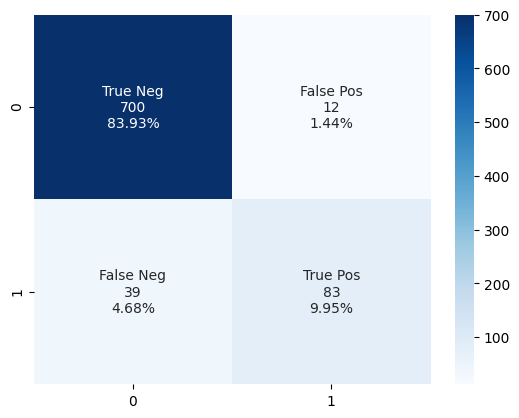

In [ ]:
rf=RandomForestClassifier(n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 1, max_features= 'auto', max_depth = 10, bootstrap = True, criterion = 'gini',random_state=1)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


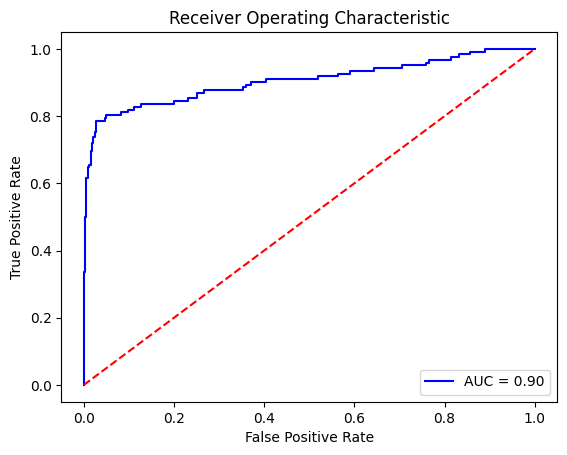

In [ ]:
#ROC Curve
predProb = rf.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###With Grid Search

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 28.3min finished


Random Forest Accuracy: 0.9424460431654677
              precision    recall  f1-score   support

   non-churn       0.95      0.98      0.97       712
       churn       0.87      0.71      0.78       122

    accuracy                           0.94       834
   macro avg       0.91      0.85      0.88       834
weighted avg       0.94      0.94      0.94       834



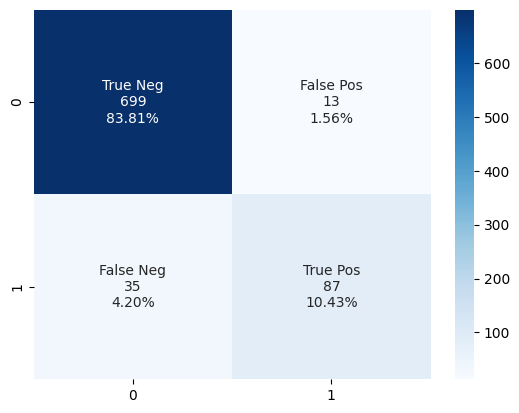

In [ ]:
forest = RandomForestClassifier(random_state = 1)
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
            min_samples_split = min_samples_split, 
            min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                    n_jobs = -1)
bestF = gridF.fit(x_train, y_train)
y_pred= bestF.predict(x_test)

print("Random Forest Accuracy:",accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))


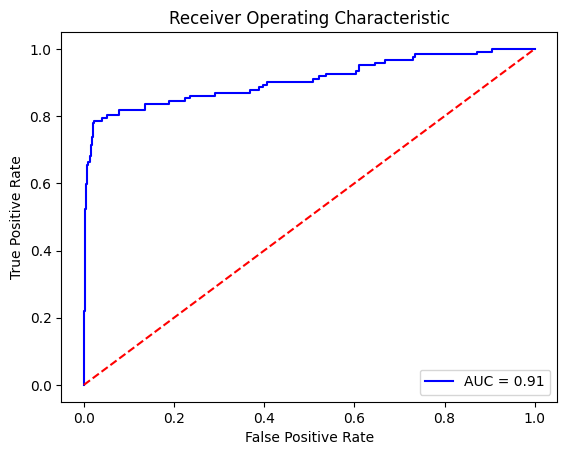

In [ ]:
#ROC Curve
predProb = gridF.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

###On Stratified Data

In [ ]:
prediction = stratified_cv(x, y, RandomForestClassifier, n_estimators = 1600, min_samples_split = 5, min_samples_leaf = 1, max_features= 'auto', max_depth = 10, bootstrap = True, criterion = 'gini',random_state=1)
print('Random Forest Classifier:      {:.2f}'.format(accuracy_score(y, prediction)))
target_names = ['Non-churn', 'Churn']
print((classification_report(y, prediction, target_names=target_names)))

Random Forest Classifier:      0.95
              precision    recall  f1-score   support

   Non-churn       0.95      0.99      0.97      2850
       Churn       0.93      0.68      0.79       483

    accuracy                           0.95      3333
   macro avg       0.94      0.84      0.88      3333
weighted avg       0.95      0.95      0.94      3333



##Cross Validation with Optimisation

In [ ]:
def bayesian_optimization(dataset, function, parameters):
   X_train, y_train, X_test, y_test = dataset
   n_iterations = 5
   gp_params = {"alpha": 1e-4}

   BO = BayesianOptimization(function, parameters)
   BO.maximize(n_iter=n_iterations, **gp_params)

   return BO.max

In [ ]:
def rfc_optimization(cv_splits):
    def function(n_estimators, max_depth, min_samples_split):
        return cross_val_score(
               RandomForestClassifier(
                   n_estimators=int(max(n_estimators,0)),                                                               
                   max_depth=int(max(max_depth,1)),
                   min_samples_split=int(max(min_samples_split,2)), 
                   n_jobs=-1, 
                   random_state=42,   
                   class_weight="balanced"),  
               X=x_train, 
               y=y_train, 
               cv=cv_splits,
               scoring="roc_auc",
               n_jobs=-1).mean()

    parameters = {"n_estimators": (10, 1000),
                  "max_depth": (1, 150),
                  "min_samples_split": (2, 10)}
    
    return function, parameters

In [ ]:
def train(X_train, y_train, X_test, y_test, function, parameters):
    dataset = (X_train, y_train, X_test, y_test)
    cv_splits = 4
    
    best_solution = bayesian_optimization(dataset, function, parameters)      
    params = best_solution["params"]

    model = RandomForestClassifier(
             n_estimators=int(max(params["n_estimators"], 0)),
             max_depth=int(max(params["max_depth"], 1)),
             min_samples_split=int(max(params["min_samples_split"], 2)), 
             n_jobs=-1, 
             random_state=42,   
             class_weight="balanced")
    model.fit(x_train,y_train) #added this
    return model #added this

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
|  1        |  0.9154   |  125.7    |  4.425    |  95.75    |
|  2        |  0.918    |  99.46    |  6.153    |  290.0    |
|  3        |  0.9176   |  137.0    |  8.5      |  939.5    |
|  4        |  0.9194   |  127.7    |  4.332    |  462.5    |
|  5        |  0.9175   |  26.09    |  8.845    |  284.1    |
|  6        |  0.9185   |  123.3    |  6.79     |  460.9    |
|  7        |  0.8691   |  1.094    |  5.167    |  999.7    |
|  8        |  0.9138   |  148.6    |  2.85     |  19.04    |
|  9        |  0.9189   |  149.9    |  9.017    |  515.9    |
|  10       |  0.9127   |  148.8    |  7.653    |  14.71    |
Random Forest w/ Bayesian Optimization Accuracy: 0.9424460431654677
[[696  16]
 [ 32  90]]
Random Forest Accuracy: 0.9424460431654677
              precision    recall  f1-score   support

   non-churn       0.96      0.98      0.97       712
       churn 

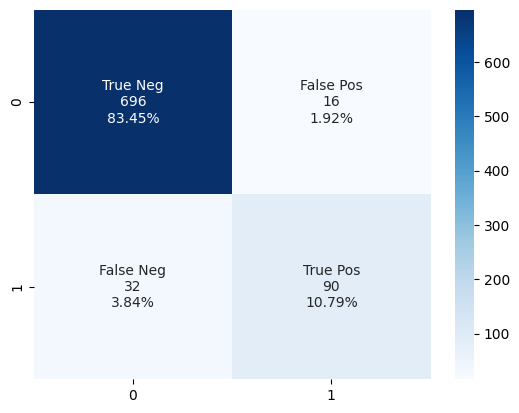

In [ ]:
func,params = rfc_optimization(10)
final_model = train(x_train,y_train,x_test,y_test,func,params)
y_pred=final_model.predict(x_test)
#print("Random Forest w/ Bayesian Optimization Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Random Forest w/ Bayesian Optimization Accuracy:",accuracy_score(y_test, y_pred))


print (confusion_matrix(y_test, y_pred))
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
target_names = ['non-churn', 'churn']
print(classification_report(y_test, y_pred, target_names=target_names))

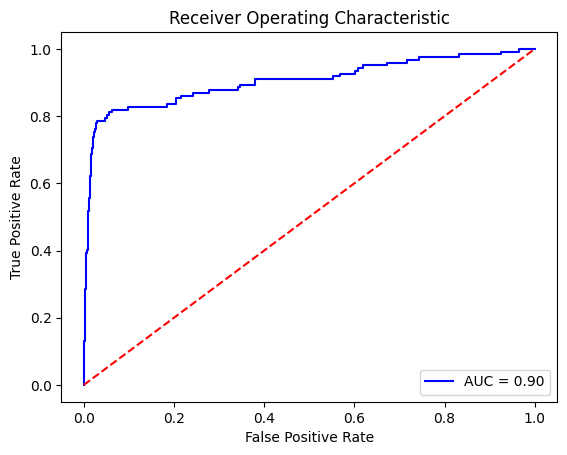

In [ ]:
#ROC Curve
predProb = final_model.predict_proba(x_test)
preds = predProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds,pos_label='True')
roc_auc = auc(fpr, tpr)
plt.close()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# E. EVALUATION

By justifying the accuracy of the model, we can deduce that the results of the data mining are acceptable, the features selected into the model contributes significantly to the accuracy of the model. With the high accuracy of prediction on customer churn, it is possible to achieve the business goal that the company wanted to find out which customer that are prone to the risk of churn so that they can make a decision on what to do next based on the available predefined action after decision-making process.

For evaluating the models mentioned above, we will be utilizing the classification accuracy as our evaluation metric as it is a common evaluation metric for classification problems. Also, accuracy is a very important aspect of creating this model as the company requires the model to be as accurate as possible to gain the most optimum result. By implementing Scikit learn accuracy score library, the model with the highest accuracy score from grid search is Adaboost Decision Tree with 95.11% classification accuracy, followed by Light Gradient Boosting with 94.95% accuracy and Random Forest with 94.12% accuracy. The accuracy is measured by comparing the predicted outcome from unseen data and the actual label of the unseen data. These results proved that majority of the prediction is accountable and useful in customer churn analytics.

Moreover, to prevent the model from overfitting, a confusion matrix is created within the model. It is one of the metrics for measuring the performance of a classification model. Normally it comes in a table with 4 different combination that shows different combinations of predicted an actual value in the dataset. This table is very useful as it can tell us how the model actually performs in term of True Positive, True Negative, False Positive and False Negative. Based on the true negative and true positive we will be able to know how many cases were predicted correctly, for both churn and non-churn label. If a model can produce a good result in classification but it performs badly when evaluated using a confusion matrix, that particular model cannot be counted as a good model. Hence, this provides us a more detailed insight that we could not get from classification accuracy. Besides, we can also get accuracy in detail from the confusion matrix. For example, we can get the accuracy of the model predicting the correct churn customer by calculating the value based on the table. Other than that, we can also calculate the recall and precision from the confusion matrix. In this context, the precision tells us in all of the churned customers, how many are they actually churn. In contrast, the recall tells us what is the percentage of customers that end up churning that the model successfully finds. Precision and recall are inversely related. Therefore, to achieve our business goal, we need to obtain a model with a recall value as low as possible while getting a high precision score. With high precision, we can ensure that the company can send the right rewards to the right people. In other words, we want to minimize the number of non-churn customers to receive rewards.

Another metric that was utilized during the model evaluation is the Receiver Operating Characteristic Curve (ROC) and Area Under the Curve (AUC) that is useful in determining whether a model useful in binary classification problems. ROC is a probability curve that plots True Positive Rate (TPR) against False Positive Rate (FPR) so the classification is shown more graphically. To simplify, the closer the curve to the left-side top corner of the graph, the better the model is at distinguishing between class, in this case, it means between the non-churn customer and churns customer. AUC comes after TPR, which involves calculating the area under the ROC. Optimally, achieving an AUC score of 1.0 that means perfect separation between non-churn customer and churn customer is the best.

The next important factor when evaluating a model for customer churn prediction is time complexity. Three of the model able to instantaneously produce prediction results which will make ad hoc customer churn prediction possible. Thus, a list of customers that is more likely to quit can be identified in a short time upon request by the management team, making it possible for any follow-up measures such as provide special incentives to the targeted customer. The short timeframe required for the analytics to be generated also allows the management team to handle churn at a fast rate and as soon as possible. This is an important factor when considering that customers will leave at any moment.

Lastly, the consistency of the model is checked by using grid search cross-validation and by stratified sample method to ensure that no overfitting occurs. The result of the grid search shows that there are minor differences in accuracy among multiple results generated by the selected model. Notably, the accuracy will have only one to three percent difference before and after using stratified samples. This means there is a clear distinction between churn and non- churn customers so it can be recognised by the model. As a result, the performance of prediction by the Adaboost Decision Tree model is stable as long as the training is done regularly for the model.

The best model produced can predict the customer churn up to 95%. This is a very good result as this meant that for every 100 customers, the model is able to accurately predict a customer’s churn potential 95% of the time. This allows the result produced by this model to be trustworthy and the company is able to confidently base their business decisions on this model. Furthermore, based on the Decision Tree model without Grid Search and ADA Boosting, the Receiver Operating Characteristics(ROC) curve shows that the decision tree classifier is able to perfectly distinguish between churn and non-churn customer but there is a different outcome from the confusion matrix. From the confusion matrix heatmap, we can see that it can accurately predict 92.9% of the time that the customer will or will not churn. It also has a very low False Negative rate with only 3.6%, hence in theory the company will only lose 3.6% of their customer due to churn. From another perspective, the company will only lose 25% of its churning customers due to incorrect predictions. This meant the company still can serve 75% of churning customers. Therefore this model can surely help the business to identify the customer that is going to churn in the future and action can be taken according to the decision of the management.
Model Accuracy - 0.951101
Final Chosen Model - Decision Tree

#F. DEPLOYMENT 
—when I deploy what we need to do 
[https://www.sv-europe.com/crisp-dm-methodology/](https://www.sv-europe.com/crisp-dm-methodology/)

- we export the result into a log file for future reference when the model needs to undergo maintenance and updates
- we also created a dashboard for showing all the essential insight after interpreting the outcome of the prediction model
- The dashboard also can produce paper reports periodically such as daily and monthly by aggregating the results from the prediction model in the selected time frame.
- In order to accept real-time input from the big database, it is essential to develop a REST API. All the requests of prediction results will be handled via REST API as it is compatible with a different software platform, whether it is mobile or desktop.

As the evaluation has been done to the final modeling technique, the model is ready to be deployed into everyday business contexts. During the deployment of this model, we will ensure necessary measures are taken to make sure that the efficiency of the model will not degrade as the model is continuously applied throughout the business. First and foremost, the result will be exported into a log file between every usage. The log file will have details regarding the accuracy history of the model, usage date, duration per run and many more. It will be used for future reference when the model needs to undergo maintenance and updates. 

Furthermore, to improve the user-friendliness of the model, the implementation of a dashboard is also incorporated into the model. The created dashboard will serve to provide essential insights for the results after interpreting the outcome of the prediction model. The implemented dashboard will also have the functionality of producing paper reports periodically based on certain criteria like creating the report based on daily and monthly. These daily and monthly reports will be produced by the aggregation of results from the prediction model based on the selected time frame. This model will work incoherent with Verizon’s data warehouse. 

In order to accept large quantities of real-time inputs from the data warehouse, the development of a REST API will be incorporated with the model. All the requests to retrieve the prediction result to other software platforms will be handled by the REST API. This will work not only on the desktop but also on mobile devices. This will allow the results from the model to be accessed simultaneously by many of the company's end-users, for example, top executives, managers and even stakeholders.

Lastly, the CRISP-DM process [[6]](#6) will be repeated once again when the company finds an obstacle or challenge in the market, or when the company hatches a new business goal. This is to ensure that the model applied is always up-to-date to the latest trends and analytics, thus preventing the risk of inaccurate out-dated information being provided to the managers.

#G. Dashboard -visualization-Presentation

![Churn_over_state](https://drive.google.com/uc?export=view&id=1F_RFH_4NtdP_oZ8cbbgefoprP6jPPkxX)



![Churn Bar](https://drive.google.com/uc?export=view&id=1oh6vIjvM2pTjy1ElyDEDBk7bEra_NfUz)

# H. Conclusion ;—summarise advantages and weaknesses of the model
Please summarize the advantages and weaknesses/limitations of your models.

Pros 

- fast in predicting the results
- robust to noise and missing values
- Produce accurate results

Cons

Weakness - the results of the decision tree are complex and hard to interpret

- unstable, a small change in the data can lead to a large change in the structure  of the decision tree when undergo training
- use significantly more time to train the model

> By 'performance' i don't mean resolution, but execution speed. The reason why it's poor is that you need to 'redraw the tree' every time you wish to update your CART model--data classified by an already-trained Tree, that you then want to add to the Tree (i.e., use as a training data point) requires that you start from over--training instances can not be added incrementally, as they can for most other supervised learning algorithms. Perhaps the best way to state this is that Decision Trees cannot be trained in online mode, rather only in batch mode. Obviously, you won't notice this limitation if you don't update your classifier, but then I would expect that you see a drop in resolution.

- prone to overfitting ( but we can overcome it by doing cross-validation )

In conclusion, the Adaboosted Decision Tree model chosen by us will have some strengths and weaknesses. The pros and benefits of the chosen model are the models are able to produce its prediction analysis in a very short time frame. Furthermore, the Adaboosted Decision Tree model is robust to noise and missing values. It is able to handle noise and missing values without compromising the accuracy of the model. The main benefit provided by this model is its ability to provide highly accurate results. Based on the testing phase, the model is able to produce results with an accuracy percentage of 95% and above. Yet there are also certain shortcomings from using this model, among those cons is the model is unstable and is susceptible to large changes in the structure of the decision tree when undergoing training if small changes are applied to the data. Training of the model also requires significantly more time. Adaboosted Decision Tree’s algorithm requires it to be trained in batch mode rather than online, this is due to the fact any changes to its classifiers will affect its overall “tree” causing it to “redraw the whole tree”, and as such affecting training time. Lastly, the Adaboosted Decision Tree is prone to overfitting but this minor issue can be easily overcome by performing cross-validation to reduce the risk of overfitting. Yet even with all these weaknesses, the Adaboosted Decision Tree is still chosen as its pros outweigh its cons, and the accuracy of its results is proven to be high and this will ensure Verizon obtains the most optimal results from it to further boost their analysis of customer churn.

#Reference


<a id="1">[1]</a> Verizon 2020, Verizon - Our Company,  viewed  20 August  2020, <<https://www.verizon.com/about/our-company>>. 

<a id="2">[2]</a> Statista 2020,  US Wireless/Mobile Subscribers By Carrier 2018 | Statista,  viewed  20 August  2020, << https://www.statista.com/statistics/283507/subscribers-to-top-wireless-carriers-in-the-us/>>.

<a id="3">[3]</a> Markidan, L. 2020,  Why Customer Churn Happens, And What You Can Do About It,  viewed  30 August  2020,  <<https://www.groovehq.com/blog/reduce-customer-churn>>.

<a id="4">[4]</a> Brownlee, J. 2020,  8 Tactics To Combat Imbalanced Classes In Your Machine Learning Dataset.,  viewed  5 September  2020,  <<https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/#:~:text=Imbalanced%20data%20typically%20refers%20to,classes%20are%20not%20represented%20equally.&text=You%20can%20have%20a%20class,can%20be%20used%20on%20either>>.

<a id="5">[5]</a> Scikit-learn 2020,  Parameter Estimation Using Grid Search With Cross-Validation — Scikit-Learn 0.23.2 Documentation,  viewed  5 September  2020, <<https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html>>.

<a id="6">[6]</a> Smart Vision Europe 2020. Crisp DM Methodology - Smart Vision Europe. viewed 13 September 2020, <<https://www.sv-europe.com/crisp-dm-methodology/>>.